# Optimization of hyperparameters to predicting a Biological Response (from Kaggle) 

# Import Libraries

In [3]:
#import libraries
import numpy as np #for matrix calculations
import pandas as pd #for data analysis and preprocessing
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization

from sklearn import linear_model #linear models
from sklearn import tree #decision trees
from sklearn import ensemble #ensembles
from sklearn import metrics #metrics
from sklearn import preprocessing #preprocessing
from sklearn.model_selection import train_test_split #selection split

%matplotlib inline
plt.style.use('seaborn')

C:\Users\Lida\AppData\Local\Temp\ipykernel_13084\2480930410.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Read Data

In [4]:
train_data=pd.read_csv('data/train_sem.zip')


# Show 3 frist row in data

In [5]:
train_data.head(3)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0


# Show Data describe

In [6]:
train_data.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Show Data info

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


# Show data corr

In [8]:
train_data.corr()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
Activity,1.000000,-0.086402,0.109226,0.167209,-0.044126,-0.148447,-0.106213,0.137016,0.172226,-0.077743,...,0.010685,0.076465,0.031133,0.016595,0.039768,0.011817,0.029445,0.005669,0.048571,0.021488
D1,-0.086402,1.000000,0.262487,0.328325,0.260002,-0.074244,0.366193,-0.430245,-0.112804,0.189056,...,0.260743,0.221889,0.224236,0.229257,0.225635,0.234814,0.096729,0.164529,0.237026,0.186957
D2,0.109226,0.262487,1.000000,0.439590,0.352263,0.227328,-0.136386,-0.032891,0.141841,-0.354988,...,0.012333,0.075043,0.015788,0.040128,0.045587,0.017283,0.023722,0.043174,0.027019,0.073585
D3,0.167209,0.328325,0.439590,1.000000,0.188451,-0.123794,-0.040728,-0.204815,0.079161,-0.141597,...,0.049737,0.135849,0.037999,0.096788,0.122743,0.021355,0.053000,0.142170,0.008959,0.198354
D4,-0.044126,0.260002,0.352263,0.188451,1.000000,-0.012298,-0.001187,-0.063331,0.064062,-0.035721,...,-0.006225,0.073802,-0.000540,0.040167,0.042837,-0.008171,0.014769,0.027448,0.008766,0.068058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D1772,0.011817,0.234814,0.017283,0.021355,-0.008171,-0.118609,0.165540,-0.140998,-0.010961,0.143035,...,0.580641,0.329251,0.552293,0.562141,0.289023,1.000000,0.249335,0.101371,0.422945,0.262122
D1773,0.029445,0.096729,0.023722,0.053000,0.014769,-0.097684,0.114388,-0.092395,0.021939,0.092533,...,0.430405,0.228236,0.214677,0.248383,0.243572,0.249335,1.000000,0.325325,0.293441,0.333455
D1774,0.005669,0.164529,0.043174,0.142170,0.027448,-0.105049,0.124192,-0.089671,0.024235,0.087579,...,0.394892,0.295706,0.156499,0.305436,0.148392,0.101371,0.325325,1.000000,0.300667,0.411980
D1775,0.048571,0.237026,0.027019,0.008959,0.008766,-0.137316,0.144459,-0.096429,0.019008,0.121252,...,0.548875,0.376011,0.403716,0.483157,0.368829,0.422945,0.293441,0.300667,1.000000,0.182508


# Show Data contain null data

In [9]:
data_null=pd.DataFrame(train_data.isnull().sum(),columns=['Number of null'])
data_null['percentage']=(train_data.isnull().sum())/len(train_data)*100
data_null

,Number of null,percentage
Activity,0,0.0
D1,0,0.0
D2,0,0.0
D3,0,0.0
D4,0,0.0
...,...,...
D1772,0,0.0
D1773,0,0.0
D1774,0,0.0
D1775,0,0.0



# Show data contain duplicate data

In [10]:
train_data.duplicated().sum()

0

# Show distrubtion of Activity

<Axes: xlabel='Activity', ylabel='count'>

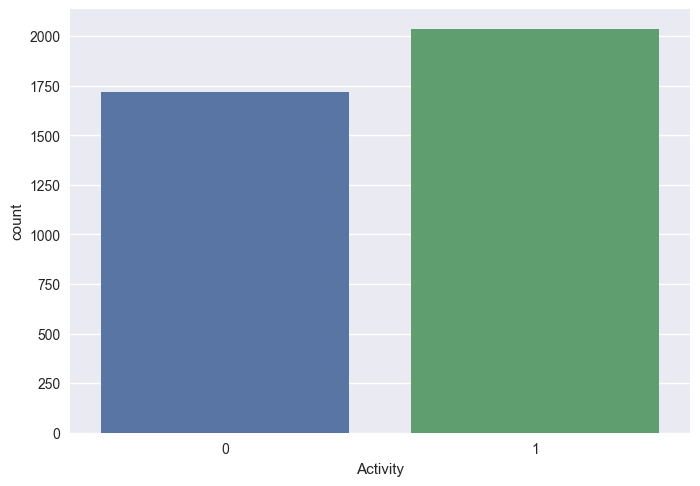

In [11]:
sns.countplot(x='Activity', data=train_data)

# Create observation matrix $X$ and response vector $y$

In [12]:
X = train_data.drop(['Activity'], axis=1)
y = train_data['Activity']

# Show $X$

In [13]:
X.head

<bound method NDFrame.head of             D1        D2    D3   D4        D5        D6        D7        D8  \
0     0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166  0.585445   
1     0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105  0.411754   
2     0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453  0.517720   
3     0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606  0.288764   
4     0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361  0.303809   
...        ...       ...   ...  ...       ...       ...       ...       ...   
3746  0.033300  0.506409  0.10  0.0  0.209887  0.633426  0.297659  0.376124   
3747  0.133333  0.651023  0.15  0.0  0.151154  0.766505  0.170876  0.404546   
3748  0.200000  0.520564  0.00  0.0  0.179949  0.768785  0.177341  0.471179   
3749  0.100000  0.765646  0.00  0.0  0.536954  0.634936  0.342713  0.447162   
3750  0.133333  0.533952  0.00  0.0  0.347966  0.757971  0.230667  0.272652   

            D9       

# Show $y$

In [14]:
y

0       1
1       1
2       1
3       1
4       0
       ..
3746    1
3747    1
3748    0
3749    1
3750    0
Name: Activity, Length: 3751, dtype: int64

# Split Data

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=.25, shuffle=True, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2813, 1776)
(2813,)
(938, 1776)
(938,)


# Model hyperparameter optimization

## Applying Logistic regression

In [16]:
# Create an object of class logistic regression
log_reg = linear_model.LogisticRegression(max_iter = 50)
# Train the model by minimizing the logloss
log_reg.fit(X_train, y_train)
print(f'accuracy on the test set: {log_reg.score(X_test, y_test):.2f}')
y_test_pred = log_reg.predict(X_test)
print(f'f1_score on the test set: {metrics.f1_score(y_test, y_test_pred):.2f}')

accuracy on the test set: 0.76
f1_score on the test set: 0.79


C:\Users\Lida\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Applying grid search (**GridSearchCV**)

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'penalty': ['l2', 'none'] ,#тип регурялизации
                  'solver': ['lbfgs', 'saga'] #алгоритм оптимизации
                  }
grid_search = GridSearchCV(
    estimator=linear_model.LogisticRegression(
        random_state=42, # генератор случайных чисел
        max_iter=25 # количество итераций на сходимость
    ), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search.fit(X_train, y_train) 
print(f'accuracy on the test set: {grid_search.score(X_test, y_test):.2f}')
y_test_pred = grid_search.predict(X_test)
print(f'f1_score on the test set: {metrics.f1_score(y_test, y_test_pred):.2f}')
print(f'Best Hyperparameter Values: {grid_search.best_params_}')

CPU times: total: 1.05 s
Wall time: 6.52 s
accuracy on the test set: 0.76
f1_score on the test set: 0.79
Best Hyperparameter Values: {'penalty': 'l2', 'solver': 'saga'}


C:\Users\Lida\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The values of the metrics have not changed, but this only means that we did not find a combination of external parameters that is better than the default ones. This is not surprising and quite often the initial hyperparameters give a good result, but this is not a reason to stop.

**Let's try to expand the hyperparameter grid**.

In [19]:
param_grid = [
              {'penalty': ['l2', 'none'] , # тип регуляризации
              'solver': ['lbfgs', 'sag'], # алгоритм оптимизации
               'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}, # уровень силы регурялизации
              
              {'penalty': ['l1', 'l2'] ,
              'solver': ['liblinear', 'saga'],
               'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}
]
grid_search_1 = GridSearchCV(
    estimator=linear_model.LogisticRegression(
        random_state=1, 
        max_iter=50
    ), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_1.fit(X_train, y_train) 
print(f'accuracy on the test set: {grid_search_1.score(X_test, y_test):.2f}')
y_test_pred = grid_search_1.predict(X_test)
print(f'f1_score on the test set: {metrics.f1_score(y_test, y_test_pred):.2f}')
print(f'Best Hyperparameter Values: {grid_search_1.best_params_}')

KeyboardInterrupt: 

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

**The metric again failed to improve, and a lot of time was spent!**

Let's get acquainted with the final model obtained using **best_estimator_**.

In [ ]:
print(f'Best model:\n{grid_search.best_estimator_}')

Best model:
LogisticRegression(max_iter=50, random_state=42, solver='saga')


In [ ]:
print(f'Best value for cross-validation accuracy: {grid_search.best_score_:.2f}')

Best value for cross-validation accuracy: 0.76


In [ ]:
# Взглянем на результаты кросс-валидации
result_cv = pd.DataFrame(grid_search_1.cv_results_)
result_cv.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.634617,0.059415,0.026751,0.002895,0.01,l2,lbfgs,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.74778,0.737123,0.751332,0.759786,0.761566,0.751517,0.008838,28
1,3.149527,0.053262,0.021848,0.001892,0.01,l2,sag,"{'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}",0.74778,0.738899,0.751332,0.759786,0.759786,0.751517,0.007874,29


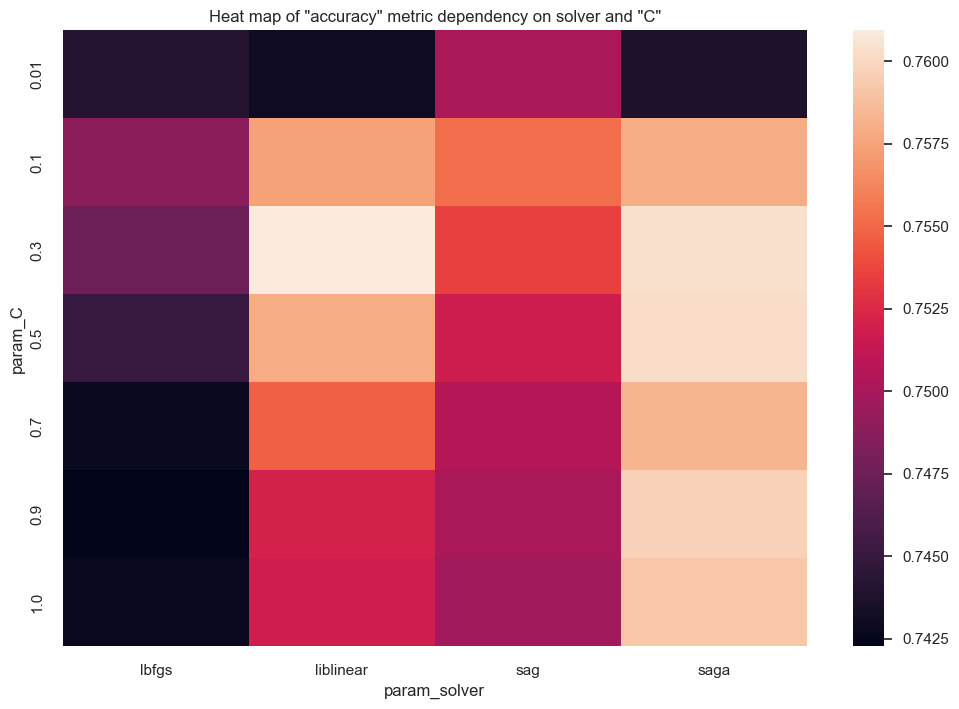

In [ ]:
# draw how the accuracy changed with different hyperparameters
visual = pd.pivot_table(pd.DataFrame(grid_search_1.cv_results_),
                        values='mean_test_score', index='param_C',
                        columns='param_solver')
sns.heatmap(visual)
plt.title('Heat map of "accuracy" metric dependency on solver and "C"') # chart caption
sns.set(rc={'figure.figsize':(12, 8)}) # set chart size

You may notice that the lbfgs optimization algorithm does not work well and weak regularization C = 0.01 negatively affects the metric, so it makes sense to take values greater than 0.3.

# Applying RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# np.linspace(start(от), stop(до), num=50(количество), dtype- тип данных)
param_distributions = {'penalty': ['l2', 'none'] ,
              'solver': ['lbfgs', 'sag'],
               'C': list(np.linspace(0.01, 1, 10, dtype=float))},
            
random_search = RandomizedSearchCV(
    estimator=linear_model.LogisticRegression(
        random_state=33, 
        max_iter=20), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter = 10, 
    n_jobs = -1
)  
%time random_search.fit(X_train, y_train) 
print(f'accuracy on the test set: {random_search.score(X_test, y_test):.2f}')
y_test_pred = random_search.predict(X_test)
print(f'f1_score on the test set: {metrics.f1_score(y_test, y_test_pred):.2f}')
print(f'Best Hyperparameter Values: {random_search.best_params_}')

C:\Users\Lida\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Lida\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


CPU times: total: 859 ms
Wall time: 8.33 s
accuracy на тестовом наборе: 0.76
f1_score на тестовом наборе: 0.79
Наилучшие значения гиперпараметров: {'solver': 'sag', 'penalty': 'none', 'C': 0.89}


C:\Users\Lida\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
param_grid = {'penalty': ['l2', 'none'] ,
              'solver': ['lbfgs', 'sag'],
               'C': list(np.linspace(0.01, 10, 10, dtype=float))},
            
grid_search_2 = GridSearchCV(
    estimator=linear_model.LogisticRegression(
        random_state=42, 
        max_iter=50), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_2.fit(X_train, y_train) 
print(f'accuracy on the test set: {grid_search_2.score(X_test, y_test):.2f}')
y_test_pred = grid_search_2.predict(X_test)
print(f'f1_score on the test set: {metrics.f1_score(y_test, y_test_pred):.2f}')
print(f'Best Hyperparameter Values: {grid_search_2.best_params_}')

CPU times: total: 1.2 s
Wall time: 45.4 s
accuracy на тестовом наборе: 0.75
f1_score на тестовом наборе: 0.78
Наилучшие значения гиперпараметров: {'C': 2.23, 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\Lida\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


It took more time to iterate over the entire GridSearchCV grid. Also, the metrics have deteriorated.

# Appling the decision tree

In [ ]:
#Создаем объект класса дерево решений
dt = tree.DecisionTreeClassifier(random_state=42)
#Обучаем дерево по алгоритму CARTrint
dt.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = dt.predict(X_train)
print(f'Train: {metrics.f1_score(y_train, y_train_pred):.2f}')
y_test_pred = dt.predict(X_test)
print(f'Test: {metrics.f1_score(y_test, y_test_pred):.2f}')

Train: 1.00
Test: 0.73


Now let's define the hyperparameter grid:
* 'min_samples_leaf' - minimum number of objects in a leaf;
* 'max_depth': maximum depth of the tree, should not be too large, otherwise there will be overfitting;
* 'criterion' - informative criterion

And count RandomizedSearchCV() and then GridSearchCV()

In [ ]:
param_distributions = {
        'min_samples_leaf': list(np.linspace(5, 100, 50, dtype=int)),
        'max_depth': list(np.linspace(1, 30, 50, dtype=int)),
        'criterion':['entropy','gini']
        }
            
random_search_tree = RandomizedSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42), 
    param_distributions=param_distributions, 
    cv=5,
    n_iter=50, 
    n_jobs=-1
)  
%time random_search_tree.fit(X_train, y_train) 
print(f'accuracy on the test set: {random_search_tree.score(X_test, y_test):.2f}')
y_test_pred = random_search_tree.predict(X_test)
print(f'f1_score on the test set: {metrics.f1_score(y_test, y_test_pred):.2f}')
print(f'Best Hyperparameter Values: {random_search_tree.best_params_}')

CPU times: total: 1.14 s
Wall time: 15 s
accuracy на тестовом наборе: 0.74
f1_score на тестовом наборе: 0.78
Наилучшие значения гиперпараметров: {'min_samples_leaf': 5, 'max_depth': 8, 'criterion': 'gini'}


In [ ]:
param_grid = {'min_samples_leaf': list(np.linspace(5, 100, 50, dtype=int)),
              'max_depth': list(np.linspace(1, 30, 50, dtype=int)),
              'criterion':['entropy','gini']
              }
            
grid_search_tree = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_tree.fit(X_train, y_train) 
print(f'accuracy на тестовом наборе: {grid_search_tree.score(X_test, y_test):.2f}')
y_test_pred = grid_search_tree.predict(X_test)
print(f'f1_score на тестовом наборе: {metrics.f1_score(y_test, y_test_pred):.2f}')
print(f'Best Hyperparameter Values: {grid_search_tree.best_params_}')

CPU times: total: 1min 40s
Wall time: 37min 59s
accuracy на тестовом наборе: 0.74
f1_score на тестовом наборе: 0.78
Наилучшие значения гиперпараметров: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 6}


# Applying random forest

In [ ]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(random_state=42)

#Обучаем модель
rf.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train)
print(f'Train: {metrics.f1_score(y_train, y_train_pred):.2f}')
y_test_pred = rf.predict(X_test)
print(f'Test: {metrics.f1_score(y_test, y_test_pred):.2f}')

Train: 1.00
Test: 0.81


Now let's define the hyperparameter grid:

* 'n_estimators' - number of trees in the forest, default = 100
* 'min_samples_leaf' - minimum number of objects in a leaf;
* 'max_depth': deep tree expansion is large, should not be too much, otherwise there will be overfitting;

And calculate RandomizedSearchCV() and then GridSearchCV()

In [ ]:
param_distributions = {'n_estimators': list(range(80, 200, 30)),
              'min_samples_leaf': [5],
              'max_depth': list(np.linspace(20, 40, 10, dtype=int))
              }
            
random_search_forest = RandomizedSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42), 
    param_distributions=param_distributions, 
    cv=5,
    n_iter = 10, 
    n_jobs = -1
)  
%time random_search_forest.fit(X_train, y_train) 
y_train_pred = random_search_forest.predict(X_train)
print(f'f1_score on the train set: {metrics.f1_score(y_train, y_train_pred):.2f}'.format())
print(f'accuracy on the test set: {random_search_forest.score(X_test, y_test):.2f}')
y_test_pred = random_search_forest.predict(X_test)
print(f'f1_score on the test set: {metrics.f1_score(y_test, y_test_pred):.2f}')
print(f'Best Hyperparameter Values: {random_search_forest.best_params_}')

CPU times: total: 2.2 s
Wall time: 23.3 s
f1_score on the train set: 0.94
accuracy on the test set: 0.80
f1_score on the test set: 0.82
Best Hyperparameter Values: {'n_estimators': 170, 'min_samples_leaf': 5, 'max_depth': 24}


In [ ]:
param_grid = {'n_estimators': list(range(80, 200, 30)),
              'min_samples_leaf': [5],
              'max_depth': list(np.linspace(20, 40, 5, dtype=int))
              }
            
grid_search_forest = GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_forest.fit(X_train, y_train) 
y_train_pred = grid_search_forest.predict(X_train)
print(f'f1_score on the train set: {metrics.f1_score(y_train, y_train_pred):.2f}')
print(f'accuracy on the test set: {grid_search_forest.score(X_test, y_test):.2f}')
y_test_pred = grid_search_forest.predict(X_test)
print(f'f1_score on the test set: {metrics.f1_score(y_test, y_test_pred):.2f}')
print(f'Best Hyperparameter Values: {grid_search_forest.best_params_}')

CPU times: total: 2.58 s
Wall time: 46.8 s
f1_score on the train set: 0.94
accuracy on the test set: 0.79
f1_score on the test set: 0.82
Best Hyperparameter Values: {'max_depth': 25, 'min_samples_leaf': 5, 'n_estimators': 170}


We implement the hyperparameter setting of the RandomForestClassifier(random_state=42) algorithm with the following grid of values:

* n_estimators = 100 to 200 in increments of 30
* min_samples_leaf = [5, 7]
* max_depth = [10, 15, 20, 25]

Use RandomizedSearchCV with parameters cv = 5, n_iter = 10

In [ ]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(random_state=42)

#Обучаем модель
rf.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train)
print(f'Train: {metrics.f1_score(y_train, y_train_pred):.2f}')
y_test_pred = rf.predict(X_test)
print(f'Test: {metrics.f1_score(y_test, y_test_pred):.2f}')

Train: 1.00
Test: 0.81


In [ ]:
param_distributions = {'n_estimators': list(range(100, 200, 30)),
              'min_samples_leaf': [5, 7],
              'max_depth': [10, 15, 20, 25]
              }
            
random_search_forest = RandomizedSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42), 
    param_distributions=param_distributions, 
    cv=5,
    n_iter = 10, 
    n_jobs = -1
)   
%time random_search_forest.fit(X_train, y_train) 
y_train_pred = random_search_forest.predict(X_train)
print(f'f1_score on the train set: {metrics.f1_score(y_train, y_train_pred):.2f}')
print(f'accuracy on the test set: {random_search_forest.score(X_test, y_test):.2f}')
y_test_pred = random_search_forest.predict(X_test)
print(f'f1_score on the test set: {metrics.f1_score(y_test, y_test_pred):.2f}')
print(f'Best Hyperparameter Values: {random_search_forest.best_params_}')

CPU times: total: 1.36 s
Wall time: 17 s
f1_score on the train set: 0.94
accuracy on the test set: 0.79
f1_score on the test set: 0.81
Best Hyperparameter Values: {'n_estimators': 100, 'min_samples_leaf': 5, 'max_depth': 25}


We implement the hyperparameter setting of the RandomForestClassifier(random_state=42) algorithm with the following grid of values:

* n_estimators = 100 to 200 in increments of 30
* min_samples_leaf = [5, 7]
* max_depth = [10, 15, 20, 25]

Use GridSearchCV with cv = 5 parameters.

In [ ]:
param_grid = {'n_estimators': list(range(100, 200, 30)),
              'min_samples_leaf': [5, 7],
              'max_depth': [10, 15, 20, 25]
              }
            
grid_search_forest = GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_forest.fit(X_train, y_train) 
y_train_pred = grid_search_forest.predict(X_train)
print(f'f1_score on the train set: {metrics.f1_score(y_train, y_train_pred):.2f}')
print(f'accuracy on the test set: {grid_search_forest.score(X_test, y_test):.2f}')
y_test_pred = grid_search_forest.predict(X_test)
print(f'f1_score on the test set: {metrics.f1_score(y_test, y_test_pred):.2f}')
print(f'Best Hyperparameter Values: {grid_search_forest.best_params_}')

CPU times: total: 1.75 s
Wall time: 58.8 s
f1_score on the train set: 0.94
accuracy on the test set: 0.78
f1_score on the test set: 0.81
Best Hyperparameter Values: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 100}


**Basic Optimization Conclusion:**

Using many examples, we were able to demonstrate the more efficient and faster work of RandomizedSearchCV on GridSearchCV.

# Applying Hyperopt

In [ ]:
# Устанавливаем библиотеку
! pip install hyperopt

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# do the import and display the version of the library
from sklearn.model_selection import cross_val_score
import hyperopt
from hyperopt import hp, fmin, tpe, Trials
# fmin is a general function, it will be customized to our functionality
# tpe - algorithm
# hp - includes a set of methods for declaring a hyperparameter search space

Set up hyperparameter optimization for the random forest algorithm.

In [ ]:
# set the hyperparameter search space
space={'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
        'max_depth' : hp.quniform('max_depth', 15, 26, 1),
        'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 10, 1)
       }

In [ ]:
# fix random_state
random_state = 42
def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=random_state):
        # the function gets the combination of hyperparameters in "params"
        params = {'n_estimators': int(params['n_estimators']),
                 'max_depth': int(params['max_depth']),
                 'min_samples_leaf': int(params['min_samples_leaf'])
                }
  
        # use this combination to build the model
        model = ensemble.RandomForestClassifier(**params, random_state=random_state)

        # train the model
        model.fit(X, y)
        score = metrics.f1_score(y, model.predict(X))
    
        # you can also train the model using cross-validation
        # apply cross validation with the same number of folds
        # score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

        # the metric needs to be minimized, so we put a minus sign
        return -score

## selection of hyperparameters

In [ ]:
%%time
# start the selection of hyperparameters

trials = Trials() # used to log results

best = fmin(hyperopt_rf, # our function
           space=space, # hyperparameter space
           algo=tpe.suggest, # optimization algorithm, set by default, optional
           max_evals=20, # maximum number of iterations
           trials=trials, # logging results
           rstate=np.random.default_rng(random_state) # fix for repeatability
          )
print(f'Best hyperparameter values {best}')

100%|██████████| 20/20 [00:32<00:00,  1.64s/trial, best loss: -0.9863560732113146]
Best hyperparameter values {'max_depth': 18.0, 'min_samples_leaf': 2.0, 'n_estimators': 103.0}
CPU times: total: 32.6 s
Wall time: 32.8 s


## calculate the accuracy for the test sample

In [ ]:
model = ensemble.RandomForestClassifier(
    random_state=random_state, 
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    min_samples_leaf=int(best['min_samples_leaf'])
)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print(f'f1_score on the train set: {metrics.f1_score(y_train, y_train_pred):.2f}')
print(f'accuracy on the test set: {model.score(X_test, y_test):.2f}')
y_test_pred = model.predict(X_test)
print(f'f1_score on the test set: {metrics.f1_score(y_test, y_test_pred):.2f}')

f1_score on the train set: 0.99
accuracy on the test set: 0.80
f1_score on the test set: 0.83


## continue the selection

In [ ]:
# if you need to continue the selection,
# then increase max_evals (should be strictly greater than in previous iterations)
# and use the old trials
best=fmin(hyperopt_rf, # our function
           space=space, # hyperparameter space
           algo=tpe.suggest, # optimization algorithm, set by default, optional
           max_evals=23, # maximum number of iterations
           trials=trials, # logging results
           rstate=np.random.default_rng(random_state)# fix for result repeatability
          )
print(f'Best hyperparameter values {best}')

100%|██████████| 23/23 [00:06<00:00,  2.16s/trial, best loss: -0.988681757656458] 
Best hyperparameter values {'max_depth': 19.0, 'min_samples_leaf': 2.0, 'n_estimators': 159.0}


We implement the hyperparameter setting of the RandomForestClassifier(random_state=42) algorithm with the following grid of values:

* n_estimators = from 100 to 300 inclusive in increments of 10
* min_samples_leaf = 3 to 7 in increments of 1
* max_depth = from 15 to 40 in steps of 1

We use Hyperopt with parameters max_evals = 20.

In [ ]:
# set the hyperparameter search space
space={'n_estimators': hp.quniform('n_estimators', 100, 300, 10),
        'max_depth' : hp.quniform('max_depth', 15, 40, 1),
        'min_samples_leaf': hp.quniform('min_samples_leaf', 3, 7, 1)
       }

In [ ]:
# fix random_state
random_state = 42
def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=random_state):
       # the function gets the combination of hyperparameters in "params"
       params = {'n_estimators': int(params['n_estimators']),
               'max_depth': int(params['max_depth']),
              'min_samples_leaf': int(params['min_samples_leaf'])
               }
  
       # use this combination to build the model
       model = ensemble.RandomForestClassifier(**params, random_state=random_state)

       # train the model
       model.fit(X, y)
       score = metrics.f1_score(y, model.predict(X))
    
       # you can also train the model using cross-validation
       # apply cross validation with the same number of folds
       # score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

       # the metric needs to be minimized, so we put a minus sign
       return -score

## selection of hyperparameters

In [ ]:
%%time
# start the selection of hyperparameters

trials = Trials() # used to log results

best=fmin(hyperopt_rf, # our function
           space=space, # hyperparameter space
           algo=tpe.suggest, # optimization algorithm, set by default, optional
           max_evals=20, # maximum number of iterations
           trials=trials, # logging results
           rstate=np.random.default_rng(random_state) # fix for repeatability
          )
print(f'Best hyperparameter values {best}')

100%|██████████| 20/20 [00:44<00:00,  2.21s/trial, best loss: -0.9737802854298041]
Best hyperparameter values {'max_depth': 22.0, 'min_samples_leaf': 3.0, 'n_estimators': 200.0}
CPU times: total: 44 s
Wall time: 44.2 s


## calculate the accuracy for the test set

In [ ]:
# calculate the accuracy for the test set
model = ensemble.RandomForestClassifier(
    random_state=random_state,
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    min_samples_leaf=int(best['min_samples_leaf'])
)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print(f'f1_score on training set: {metrics.f1_score(y_train, y_train_pred):.2f}')
print(f'accuracy on test set: {model.score(X_test, y_test):.2f}')
y_test_pred = model.predict(X_test)
print(f'f1_score on test set: {metrics.f1_score(y_test, y_test_pred):.2f}')

f1_score on training set: 0.97
accuracy on test set: 0.81
f1_score on test set: 0.83


## continue the selection

In [ ]:
# if you need to continue the selection,
# then increase max_evals (should be strictly greater than in previous iterations)
# and use the old trials
best = fmin(hyperopt_rf, # our function
           space=space, # hyperparameter space
           algo=tpe.suggest, # optimization algorithm, set by default, optional
           max_evals=23, # maximum number of iterations
           trials=trials, # logging results
           rstate=np.random.default_rng(random_state)# fix for result repeatability
          )
print(f'Best hyperparameter values {best}')

100%|██████████| 23/23 [00:08<00:00,  2.72s/trial, best loss: -0.9737802854298041]
Best hyperparameter values {'max_depth': 22.0, 'min_samples_leaf': 3.0, 'n_estimators': 200.0}


# Applying Optuna

In [ ]:
# Install library
! pip install optuna

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import optuna

In [ ]:
def optuna_rf(trial):
    # set hyperparameter search spaces
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

    # create a model
    model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                           max_depth=max_depth,
                                           min_samples_leaf=min_samples_leaf,
                                           random_state=random_state)
    # train the model
    model.fit(X_train, y_train)
    score = metrics.f1_score(y_train, model.predict(X_train))

    return score

##  maximize the metric

In [ ]:
%%time
# create an object of study
# we can directly specify that we need to maximize the metric direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# looking for the best combination of hyperparameters n_trials times
study.optimize(optuna_rf, n_trials=20)

[I 2023-07-11 20:25:59,365] A new study created in memory with name: RandomForestClassifier
[I 2023-07-11 20:26:01,465] Trial 0 finished with value: 0.9153667441088617 and parameters: {'n_estimators': 190, 'max_depth': 28, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9153667441088617.
[I 2023-07-11 20:26:03,762] Trial 1 finished with value: 0.9436102769436103 and parameters: {'n_estimators': 193, 'max_depth': 12, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9436102769436103.
[I 2023-07-11 20:26:06,511] Trial 2 finished with value: 0.9906914893617021 and parameters: {'n_estimators': 188, 'max_depth': 29, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.9906914893617021.
[I 2023-07-11 20:26:07,922] Trial 3 finished with value: 0.9405907733156322 and parameters: {'n_estimators': 112, 'max_depth': 27, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.9906914893617021.
[I 2023-07-11 20:26:10,011] Trial 4 finished with value: 0.9188473004306061 and parameters: {'n_

CPU times: total: 40.8 s
Wall time: 41.1 s


## display the results

In [ ]:
# display the results on the training set
print(f'Best Hyperparameter Values {study.best_params}')
print(f'f1_score on training set: {study.best_value:.2f}')

Best Hyperparameter Values {'n_estimators': 188, 'max_depth': 29, 'min_samples_leaf': 2}
f1_score on training set: 0.99


## calculate the accuracy for the test set

In [ ]:
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print(f'accuracy на тестовом наборе: {model.score(X_test, y_test):.2f}')
y_test_pred = model.predict(X_test)
print(f'f1_score на тестовом наборе: {metrics.f1_score(y_test, y_test_pred):.2f}')

accuracy на тестовом наборе: 0.81
f1_score на тестовом наборе: 0.83


## continue the selection by specifying n_trials

In [ ]:
%%time
# we can continue the selection by specifying n_trials (any number that will be added to previous iterations)
study.optimize(optuna_rf, n_trials=10)

[I 2023-07-11 20:26:45,910] Trial 20 finished with value: 0.9906914893617021 and parameters: {'n_estimators': 180, 'max_depth': 30, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.9906914893617021.
[I 2023-07-11 20:26:48,461] Trial 21 finished with value: 0.9916860658463584 and parameters: {'n_estimators': 182, 'max_depth': 30, 'min_samples_leaf': 2}. Best is trial 21 with value: 0.9916860658463584.
[I 2023-07-11 20:26:50,555] Trial 22 finished with value: 0.9730986383261375 and parameters: {'n_estimators': 160, 'max_depth': 30, 'min_samples_leaf': 3}. Best is trial 21 with value: 0.9916860658463584.
[I 2023-07-11 20:26:53,146] Trial 23 finished with value: 0.9916860658463584 and parameters: {'n_estimators': 184, 'max_depth': 28, 'min_samples_leaf': 2}. Best is trial 21 with value: 0.9916860658463584.
[I 2023-07-11 20:26:55,560] Trial 24 finished with value: 0.9737628694785785 and parameters: {'n_estimators': 187, 'max_depth': 28, 'min_samples_leaf': 3}. Best is trial 21 with val

CPU times: total: 23.2 s
Wall time: 23.4 s


## visualization

In [ ]:
optuna.visualization.plot_optimization_history(study, target_name="f1_score")

In [ ]:
optuna.visualization.plot_param_importances(study, target_name="f1_score")

In [ ]:
optuna.visualization.plot_contour(study, params=["max_depth", "n_estimators"],
                                  target_name="f1_score")

## use Optuna with over parameters 

We implement the hyperparameter setting of the RandomForestClassifier(random_state=42) algorithm with the following grid of values:

* n_estimators = from 100 to 300 inclusive in increments of 10
* min_samples_leaf = 3 to 7 in increments of 1
* max_depth = from 15 to 40 in steps of 1

We use Optuna with parameters n_trails = 20.

In [ ]:
def optuna_rf(trial):
    # set hyperparameter search spaces
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 10)
    max_depth = trial.suggest_int('max_depth', 15, 40, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 7, 1)

    # create a model
    model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                            max_depth=max_depth,
                                            min_samples_leaf=min_samples_leaf,
                                            random_state=random_state)
    # train the model
    model.fit(X_train, y_train)
    score = metrics.f1_score(y_train, model.predict(X_train))

    return score

## maximize the metric

In [ ]:
%%time
# create an object of study
# we can directly specify that we need to maximize the metric direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# looking for the best combination of hyperparameters n_trials times
study.optimize(optuna_rf, n_trials=20)

[I 2023-07-11 20:27:07,369] A new study created in memory with name: RandomForestClassifier
[I 2023-07-11 20:27:09,038] Trial 0 finished with value: 0.9415670650730411 and parameters: {'n_estimators': 130, 'max_depth': 33, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9415670650730411.
[I 2023-07-11 20:27:10,751] Trial 1 finished with value: 0.9537437603993345 and parameters: {'n_estimators': 140, 'max_depth': 26, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9537437603993345.
[I 2023-07-11 20:27:12,397] Trial 2 finished with value: 0.9392228495516441 and parameters: {'n_estimators': 140, 'max_depth': 32, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9537437603993345.
[I 2023-07-11 20:27:14,466] Trial 3 finished with value: 0.942620232172471 and parameters: {'n_estimators': 170, 'max_depth': 32, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9537437603993345.
[I 2023-07-11 20:27:16,330] Trial 4 finished with value: 0.9269102990033222 and parameters: {'n_e

CPU times: total: 32.1 s
Wall time: 32.4 s


## display the results on the training set

In [ ]:
print(f'Best Hyperparameter Values {study.best_params}')
print(f'f1_score on training set: {study.best_value:.2f}')

Best Hyperparameter Values {'n_estimators': 110, 'max_depth': 37, 'min_samples_leaf': 3}
f1_score on training set: 0.97


## calculate the accuracy for the test set

In [ ]:
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score on test set: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.81
f1_score на тестовом наборе: 0.83
